In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


We can see we have only two columns in our dataset, the category column is our target variable.

In [5]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Operations Manager           40
Data Science                 40
Mechanical Engineer          40
Blockchain                   40
ETL Developer                40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

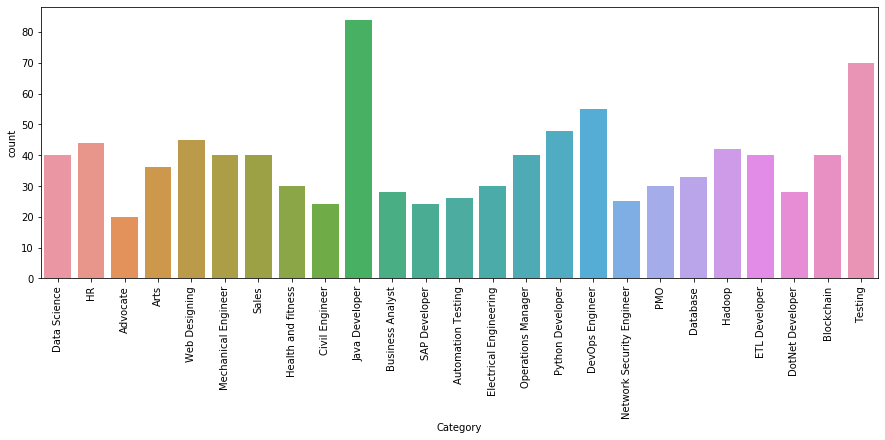

In [7]:
# visualizing our target variable count
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x='Category', data=df)

From our visualization we can see that the top 5 job category include Java Developer, Testing, DevOps Engineer, Python Developer and Web Designing

### Data Preprocessing
Before we go ahead to work with the dataset, we need to first clean it so it dosen't add noise to our model.

In [8]:
# keeping a copy of our original dataset
df_clean = df.copy()

In [9]:
def updated_resume(text):
    text.lower()
    text = re.sub('#S+', '', text)  # remove hashtags
    text = re.sub('httpS+s*', ' ', text)  # remove URLs
    text = re.sub(r'[^x00-x7f]',' ', text)  # remove non-ASCII characters
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub('@S+', '  ', text)  # remove mentions
    text = re.sub('s+', ' ', text)  # remove extra whitespace
    return text

df_clean['Resume'] = df_clean['Resume'].apply(updated_resume)

In [10]:
#original dataset before cleaning
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [11]:
# dataset after cleaning irregular characters present in Resume column
df_clean

,Category,Resume
0,Data Science,Skill Programming Language P thon panda ...
1,Data Science,Education Detail Ma 2013 to Ma 2017 B E ...
2,Data Science,Area of Intere t Deep Learning Control S te...
3,Data Science,Skill R P thon SAP HANA Table...
4,Data Science,Education Detail MCA YMCAUST Faridabad...
...,...,...
957,Testing,Computer Skill Proficient in MS office ...
958,Testing,Willingne to a ept the challenge Po...
959,Testing,PERSONAL SKILLS Quick learner Eagerne...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...


### Splitting the dataset 

In [12]:
x = df_clean['Resume']
y = df_clean['Category']

## Model building

In [13]:
# encoding text using TfidfVectorizer
tf = TfidfVectorizer(stop_words='english', max_features=1500)
vector = tf.fit_transform(x)

In [14]:
# splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(vector, y, test_size=0.2)

### Random Forest Classifier

In [15]:
# building random forest model
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
rand_pred = rand.predict(x_test)

In [16]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test, rand_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test, rand_pred)*100}%")

f1 score = 99.46571563151875%
Accuracy score = 99.48186528497409%


### Logistic Regression

In [17]:
log = LogisticRegression()
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

In [18]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test, log_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test, log_pred)*100}%")

f1 score = 99.471948831098%
Accuracy score = 99.48186528497409%


### KNeighbors Classifier

In [19]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn_pred = kn.predict(x_test)

In [20]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test, kn_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test, kn_pred)*100}%")

f1 score = 96.87880794780168%
Accuracy score = 96.89119170984456%


### Support Vector Machine

In [28]:
sv = SVC()
sv.fit(x_train, y_train)
sv_pred = sv.predict(x_test)

In [29]:
# checking accuracy score and f1 score
print(f"f1 score = {f1_score(y_test, sv_pred, average='weighted')*100}%")
print(f"Accuracy score = {accuracy_score(y_test, sv_pred)*100}%")

f1 score = 99.471948831098%
Accuracy score = 99.48186528497409%


After trying the model with different algorithm such as RandomForestClassifier, KNeighborsClassifier, Support Vector Machine(SVC) and LogisticRegression, they all performed well with an accuracy of between 96-100% but i choose to go with RandomForestClassifier because it proved more consistent when the program was re-run multiple times. 